In [23]:
include("iLQR.jl")
using iLQR
using Plots
using MeshCatMechanisms
using RigidBodyDynamics

In [8]:
## Simple Pendulum
n = 2 # number of states 
m = 1 # number of controls

function fc(x,u)
    # continuous dynamics (as defined in https://github.com/HarvardAgileRoboticsLab/unscented-dynamic-programming/blob/master/pendulum_dynamics.m)
    m = 1.
    l = 0.5
    b = 0.1
    lc = 0.5
    I = 0.25
    g = 9.81
    return [x[2]; (u - m*g*lc*sin(x[1]) - b*x[2])];
end

#initial and goal conditions
x0 = [0.; 0.]
xf = [pi; 0.] # (ie, swing up)

Q = 1e-3eye(n)
Qf = 100.0*eye(n)
R = 1e-3*eye(m)

#simulation
dt = 0.1
tf = 5.0
pendulum = iLQR.Model(fc,n,m)
obj = iLQR.Objective(Q,R,Qf,tf,x0,xf)
solver = iLQR.Solver(pendulum,obj,dt=dt);

U = zeros(solver.model.m,solver.N)
X_pendulum, U_pendulum = @time iLQR.solve(solver,U)

Initial Cost: 493.7220253622946

*** Iteration: 1 ***
New cost: 120.8891223278371
- Expected improvement: 616.5129183299516
- Actual improvement: 372.83290303445744
- (z = 0.6047446727384242)

*** Iteration: 2 ***
New cost: 31.41366703847703
- Expected improvement: 150.57119932168052
- Actual improvement: 89.47545528936007
- (z = 0.594240171377028)

*** Iteration: 3 ***
New cost: 8.241703854796262
- Expected improvement: 38.77823289695874
- Actual improvement: 23.171963183680766
- (z = 0.5975507766239155)

*** Iteration: 4 ***
New cost: 2.3291737997965107
- Expected improvement: 9.850771092483978
- Actual improvement: 5.912530054999751
- (z = 0.6002098718455595)

*** Iteration: 5 ***
New cost: 0.8329996868267484
- Expected improvement: 2.4858349231681895
- Actual improvement: 1.4961741129697623
- (z = 0.601879915285321)

*** Iteration: 6 ***
New cost: 0.4506126860884801
- Expected improvement: 0.632221384171518
- Actual improvement: 0.3823870007382683
- (z = 0.6048308556335211)

*** It

([0.0 -0.0102183 … 3.14105 3.14156; 0.0 -0.203192 … 0.0102805 1.16856e-5], [-2.05892 -1.66831 … -0.101186 5.76429e-316])

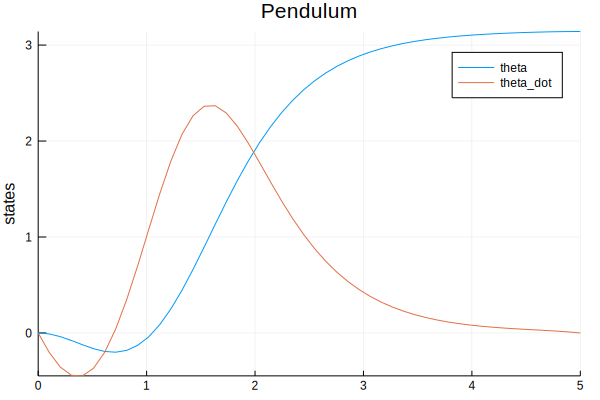

In [10]:
P = plot(linspace(0,tf,solver.N),X_pendulum[1,:],label="theta")
P = plot!(linspace(0,tf,solver.N),X_pendulum[2,:],label="theta_dot",title="Pendulum",ylabel="states")

In [17]:
## Double pendulum
urdf_dp = "urdf/doublependulum.urdf"
dp = iLQR.Model(urdf_dp)

# initial and goal states
x0 = [0.;0.;0.;0.]
xf = [pi;0.;0.;0.]

# costs
Q = 0.0001*eye(4)
Qf = 250.0*eye(4)
R = 0.0001*eye(2)

# simulation
tf = 5.0
dt = 0.1

obj = iLQR.Objective(Q,R,Qf,tf,x0,xf)
solver = iLQR.Solver(dp,obj,dt=dt);

U = 10.0*rand(solver.model.m,solver.N)
X_dp, U_dp = @time iLQR.solve(solver,U);

Initial Cost: 2098.1920163677783

*** Iteration: 1 ***
New cost: 1149.985604267515
- Expected improvement: 1180.049191458961
- Actual improvement: 948.2064121002632
- (z = 0.8035312586655327)

*** Iteration: 2 ***
New cost: 625.5024276561087
- Expected improvement: 646.7414745877666
- Actual improvement: 524.4831766114064
- (z = 0.8109626446111444)

*** Iteration: 3 ***
New cost: 362.94200769054896
- Expected improvement: 351.75305798376337
- Actual improvement: 262.56041996555973
- (z = 0.7464339371221026)

*** Iteration: 4 ***
New cost: 220.13806248935666
- Expected improvement: 204.0760027258106
- Actual improvement: 142.8039452011923
- (z = 0.6997586354778749)

*** Iteration: 5 ***
New cost: 133.46080002291026
- Expected improvement: 123.75697954354158
- Actual improvement: 86.6772624664464
- (z = 0.7003828211236411)

*** Iteration: 6 ***
New cost: 79.17925977065887
- Expected improvement: 75.00382593093212
- Actual improvement: 54.28154025225139
- (z = 0.7237169514824081)

*** Ite

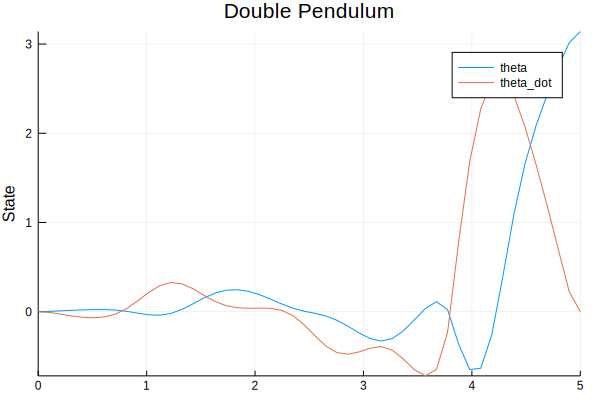

In [18]:
P = plot(linspace(0,tf,solver.N),X_dp[1,:],title="Double Pendulum",label="theta")
P = plot!(linspace(0,tf,solver.N),X_dp[2,:],ylabel="State",label="theta_dot")

In [24]:
vis = MechanismVisualizer(parse_urdf(Float64,urdf_dp),URDFVisuals(urdf_dp));
IJuliaCell(vis)

state = MechanismState(parse_urdf(Float64,urdf_dp))
for i = 1:size(X_dp,2)
    set_configuration!(state, X_dp[1:2,i])
    set_configuration!(vis, configuration(state))
    sleep(0.1)
end